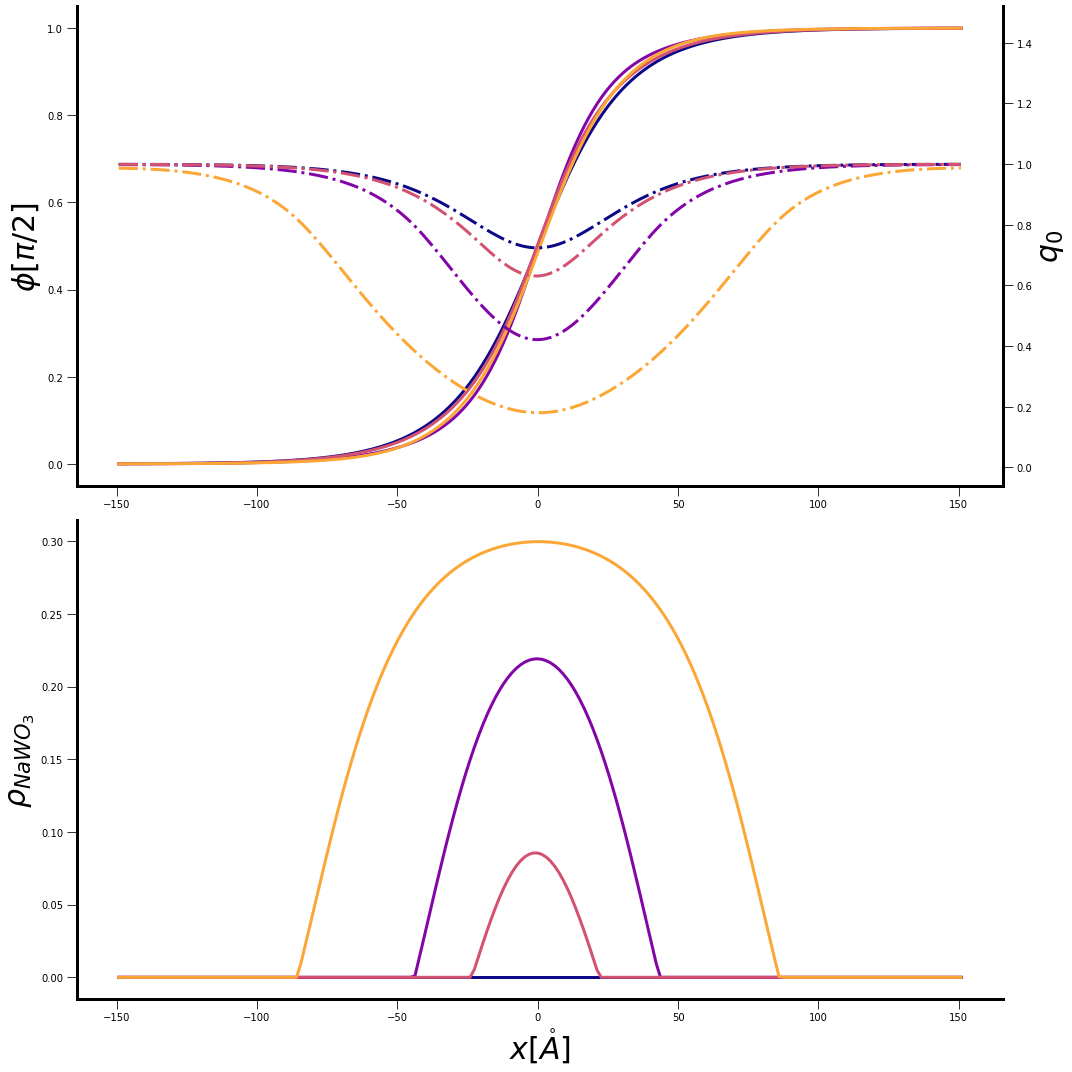

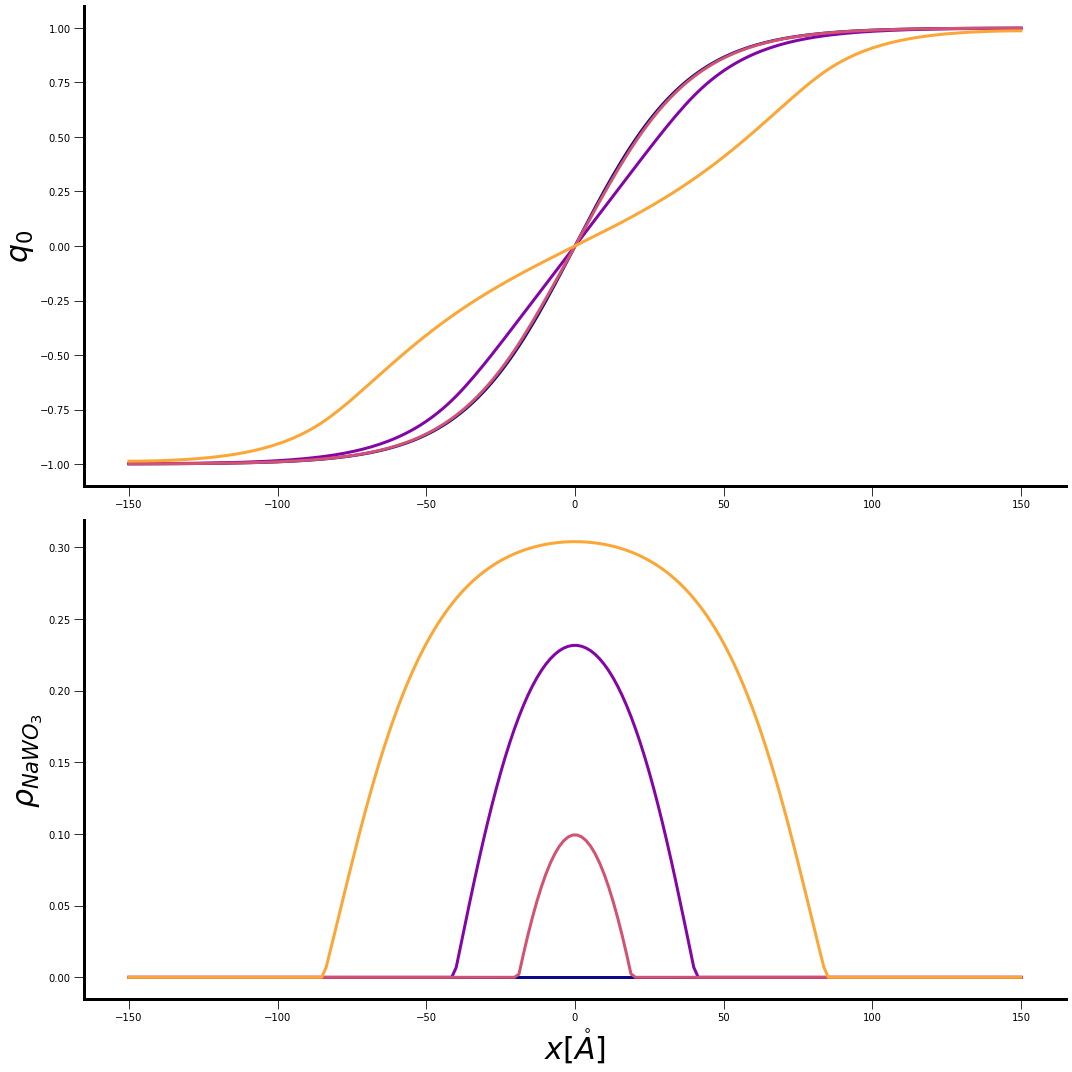

In [3]:
import numpy as np
import matplotlib.pyplot as plt


#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:60% !important; }</style>"))


Neel_filenames = ["DATA/DOMAIN_WALLS/n200_c0.Neel_varQ_charge",
                  "DATA/DOMAIN_WALLS/n200_c1E1.Neel_varQ_charge",
                  "DATA/DOMAIN_WALLS/n200_c2E1.Neel_varQ_charge", 
                  "DATA/DOMAIN_WALLS/n200_c3E1.Neel_varQ_charge"
                 ]
Ising_filenames = ["DATA/DOMAIN_WALLS/n200_c0.Ising_charge",
                   "DATA/DOMAIN_WALLS/n200_c1E1.Ising_charge",
                   "DATA/DOMAIN_WALLS/n200_c2E1.Ising_charge",
                   "DATA/DOMAIN_WALLS/n200_c3E1.Ising_charge"
                  ]

charges = [0, 1e-1, 2e-1, 3e-1]


#_________________________________________________________#

#open the files
Neel_files = []
Ising_files = []
for filename in Neel_filenames:
    Neel_files.append(np.loadtxt(filename))
    
for filename in Ising_filenames:
    Ising_files.append(np.loadtxt(filename))

volume = 7.3236460686 * 7.7495899200 * 7.3236460686
shifts = []
for file in Neel_files:
    #find the necessary shifts to center plots
    shift = np.argmin(file[:,2])
    shift = 0 - file[shift, 0]
    shifts.append(shift)

    #normalizing phi to pi/2 
    file[:,1] /= np.pi/2

    #normalizing q to bulk amplitude
    file[:,2] /= 0.749103
    
    #normalizing rho to bulk charge density of NaWO3
    file[:,3] *= volume / 1000


for file in Ising_files:
    #normalizing q to bulk amplitude
    file[:,1] /= 0.749103

    #normalizing rho to bulk charge density of NaWO3
    file[:,2] *= volume / 1000


colormap = plt.cm.plasma
norm = plt.Normalize(vmin = charges[0], vmax=charges[len(charges)-1]*1.25)

#____________________________________NEEL PLOTS_____________________________________#
#___________________________________________________________________________________#
plt.figure(1, figsize=[15,15])

#______________________PLOT PHI AND q______________________#
ax = plt.subplot(2,1,1)
ax2 = ax.twinx()
ax.tick_params(length=10)
ax2.tick_params(length=10)

for i, file in enumerate(Neel_files):
    ax.plot(file[:,0]+shifts[i], file[:,1], linewidth=3, color=colormap(norm(charges[i])))
    ax2.plot(file[:,0]+shifts[i], file[:,2], linestyle='-.', linewidth=3, color=colormap(norm(charges[i])))


ax2.set_ylim([-0.06,1.52])
ax.set_ylabel("$\phi [\pi/2]$", fontsize=30)
ax2.set_ylabel(r"$q_0$", fontsize=30)

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax2.spines['left'].set_linewidth(3)
ax2.spines['bottom'].set_linewidth(3)
ax2.spines['right'].set_linewidth(3)


#______________________PLOT RHO______________________#
ax = plt.subplot(2,1,2)
ax.tick_params(length=10)

for i, file in enumerate(Neel_files):
    ax.plot(file[:,0]+shifts[i], -file[:,3], linewidth=3, color=colormap(norm(charges[i])))

ax.set_xlabel("$x [\mathring{A}]$", fontsize=30)
ax.set_ylabel(r"$\rho_{NaWO_3}$", fontsize=30)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

plt.tight_layout()
plt.savefig('Neel_charge.eps', bbox_inches='tight')


#___________________________________ISING PLOTS_____________________________________#
#___________________________________________________________________________________#

plt.figure(2, figsize=[15,15])
ax = plt.subplot(2,1,1)
ax.tick_params(length=10)

#______________________PLOT q______________________#
for i, file in enumerate(Ising_files):
    ax.plot(file[:,0], file[:,1], linewidth=3, color=colormap(norm(charges[i])))


ax.set_ylabel("$q_0$", fontsize=30)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

#______________________PLOT RHO______________________#
ax = plt.subplot(2,1,2)
ax.tick_params(length=10)
for i, file in enumerate(Ising_files):
    ax.plot(file[:,0], -file[:,2], linewidth=3, color=colormap(norm(charges[i])))

ax.set_ylabel(r"$\rho_{NaWO_3}$", fontsize=30)
ax.set_xlabel("$x [\mathring{A}]$", fontsize=30)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

plt.tight_layout()
plt.savefig('Ising_charge.eps', bbox_inches='tight')

plt.show()